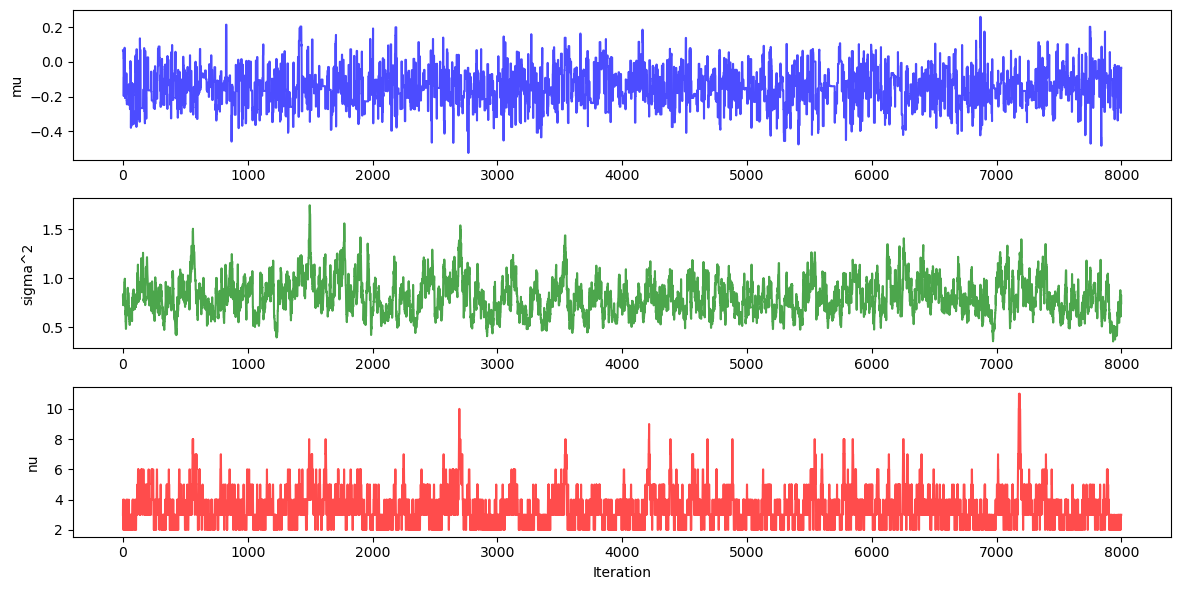

In [3]:
#Q1

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.special import gammaln

# Set random seed for reproducibility
np.random.seed(42)

# Sample size
n = 100

# True parameters
true_mu = 0.0
true_sigma2 = 1.0
true_nu = 5

# Generate data from t-distribution
x = true_mu + np.sqrt(true_sigma2) * stats.t.rvs(df=true_nu, size=n)

# Prior parameters
mu0, tau0 = 0.0, 1.0  # Normal prior for mu
sigma0 = 1.0  # Half-normal prior for sigma

# Log-posterior function
def log_post(mu, sigma2, nu, x, mu0, tau0, sigma0):
    """Compute log posterior density."""
    if sigma2 <= 0 or nu < 1 or nu > 100:
        return -np.inf  # Invalid parameter values

    log_likelihood = np.sum(
        gammaln((nu + 1) / 2) - gammaln(nu / 2) - 0.5 * np.log(np.pi * nu * sigma2) -
        ((nu + 1) / 2) * np.log(1 + ((x - mu) ** 2) / (nu * sigma2))
    )
    log_prior_mu = 0.5 * np.log(tau0 / (2 * np.pi)) - (tau0 / 2) * (mu - mu0) ** 2
    log_prior_sigma2 = 0.5 * np.log(2 / (np.pi * sigma0 ** 2)) - (sigma2 ** 2) / (2 * sigma0 ** 2)
    log_prior_nu = -np.log(100)  # Discrete uniform

    return log_likelihood + log_prior_mu + log_prior_sigma2 + log_prior_nu

# Metropolis-within-Gibbs Sampler
iters = 10000  # Number of iterations
burn_in = 2000  # Burn-in period

# Storage for samples
mu_samples = np.zeros(iters)
sigma2_samples = np.zeros(iters)
nu_samples = np.zeros(iters, dtype=int)

# Initial values
mu_current = 0.0
sigma2_current = 1.0
nu_current = 10
log_post_current = log_post(mu_current, sigma2_current, nu_current, x, mu0, tau0, sigma0)

# Proposal standard deviations
mu_prop_sd = 0.5
log_sigma2_prop_sd = 0.1  # Propose in log-space

# MCMC Sampling
for t in range(iters):
    # Step 1: Sample mu using a Normal proposal
    mu_proposal = mu_current + np.random.normal(0, mu_prop_sd)
    log_post_proposal = log_post(mu_proposal, sigma2_current, nu_current, x, mu0, tau0, sigma0)
    if np.log(np.random.rand()) < log_post_proposal - log_post_current:
        mu_current = mu_proposal
        log_post_current = log_post_proposal
    mu_samples[t] = mu_current

    # Step 2: Sample sigma^2 using a log-normal proposal
    log_sigma2_current = np.log(sigma2_current)
    log_sigma2_proposal = log_sigma2_current + np.random.normal(0, log_sigma2_prop_sd)
    sigma2_proposal = np.exp(log_sigma2_proposal)
    log_post_proposal = log_post(mu_current, sigma2_proposal, nu_current, x, mu0, tau0, sigma0)
    if np.log(np.random.rand()) < log_post_proposal - log_post_current + log_sigma2_proposal - log_sigma2_current:
        sigma2_current = sigma2_proposal
        log_post_current = log_post_proposal
    sigma2_samples[t] = sigma2_current

    # Step 3: Sample nu using a discrete random walk proposal
    nu_proposal = nu_current + np.random.choice([-1, 1])
    nu_proposal = np.clip(nu_proposal, 1, 100)  # Ensure within valid range
    log_post_proposal = log_post(mu_current, sigma2_current, nu_proposal, x, mu0, tau0, sigma0)
    if np.log(np.random.rand()) < log_post_proposal - log_post_current:
        nu_current = nu_proposal
        log_post_current = log_post_proposal
    nu_samples[t] = nu_current

# Discard burn-in samples
mu_samples = mu_samples[burn_in:]
sigma2_samples = sigma2_samples[burn_in:]
nu_samples = nu_samples[burn_in:]

# Plot results
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(mu_samples, color='blue', alpha=0.7)
plt.ylabel("mu")

plt.subplot(3, 1, 2)
plt.plot(sigma2_samples, color='green', alpha=0.7)
plt.ylabel("sigma^2")

plt.subplot(3, 1, 3)
plt.plot(nu_samples, color='red', alpha=0.7)
plt.ylabel("nu")
plt.xlabel("Iteration")

plt.tight_layout()
plt.show()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mu, sigma, nu]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 3 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mu, sigma, nu]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 3 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mu, sigma, nu]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 3 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mu, sigma, nu]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 3 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


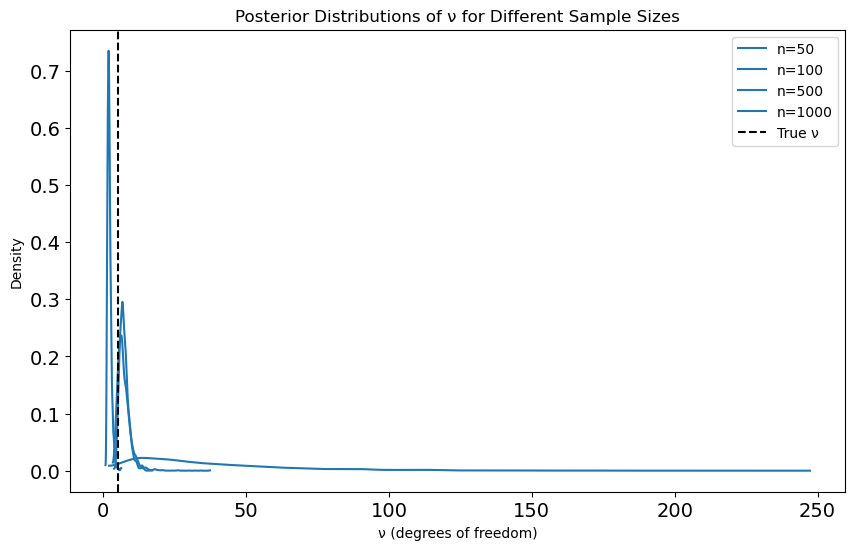

Sample size: 50
      mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
nu  38.003  30.679   2.694   94.324      0.566      0.4    2590.0    2206.0   

    r_hat  
nu    1.0  
Sample size: 100
     mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
nu  2.088  0.677   1.029    3.302      0.016    0.011    1908.0    1935.0   

    r_hat  
nu    1.0  
Sample size: 500
     mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
nu  7.216  2.519   3.783   11.307      0.056    0.044    2381.0    2209.0   

    r_hat  
nu    1.0  
Sample size: 1000
     mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
nu  7.216  1.598    4.58    10.09       0.04    0.029    1696.0    1785.0   

    r_hat  
nu    1.0  


In [4]:
# Q2

import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Sample sizes to test
sample_sizes = [50, 100, 500, 1000]

# True parameters
true_mu = 0.0
true_sigma = 1.0
true_nu = 5

# Dictionary to store results
results = {}

for n in sample_sizes:
    # Generate synthetic data from Student-t distribution
    x = true_mu + true_sigma * stats.t.rvs(df=true_nu, size=n)

    with pm.Model() as model:
        # Priors
        mu = pm.Normal("mu", mu=0, sigma=5)
        sigma = pm.HalfNormal("sigma", sigma=1)
        nu = pm.Exponential("nu", lam=1/30)  # Continuous prior for better inference

        # Likelihood
        obs = pm.StudentT("obs", nu=nu, mu=mu, sigma=sigma, observed=x)

        # Sampling with NUTS
        idata = pm.sample(2000, tune=1000, chains=2, target_accept=0.9, return_inferencedata=True)

    results[n] = idata  # Store results

# Plot posterior distributions of nu for different sample sizes
plt.figure(figsize=(10, 6))
for n in sample_sizes:
    az.plot_kde(results[n].posterior["nu"].values.flatten(), label=f"n={n}")

plt.axvline(true_nu, color="black", linestyle="--", label="True ν")
plt.xlabel("ν (degrees of freedom)")
plt.ylabel("Density")
plt.legend()
plt.title("Posterior Distributions of ν for Different Sample Sizes")
plt.show()

# Convergence diagnostics
for n in sample_sizes:
    print(f"Sample size: {n}")
    print(az.summary(results[n], var_names=["nu"]))


## Q3 

$$
\int_0^{\infty} p\left(y_i \mid \tau_i\right) p\left(\tau_i\right) d \tau_i=\int_0^{\infty} \sqrt{\frac{\tau_i}{2 \pi}} \exp \left(-\frac{1}{2} \tau_i y_i^2\right) \frac{\left(\frac{\nu}{2}\right)^{\nu / 2}}{\Gamma\left(\frac{\nu}{2}\right)} \tau_i^{\nu / 2-1} \exp \left(-\frac{\nu}{2} \tau_i\right) d \tau_i
$$


Combining the powers of $\tau_i$,

$$
\sqrt{\tau_i} \tau_i^{\nu / 2-1}=\tau_i^{\frac{1}{2}+\frac{\nu}{2}-1}=\tau_i^{\frac{\nu-1}{2}}
$$

so that the integrand becomes

$$
\frac{1}{\sqrt{2 \pi}} \frac{\left(\frac{\nu}{2}\right)^{\nu / 2}}{\Gamma\left(\frac{\nu}{2}\right)} \tau_i^{\frac{\nu-1}{2}} \exp \left(-\frac{1}{2} \tau_i\left(y_i^2+\nu\right)\right)
$$

Recognize that this is the kernel of a Gamma density with shape parameter

$$
a=\frac{\nu+1}{2} \quad \text { and rate } \quad b=\frac{y_i^2+\nu}{2}
$$

Thus,

$$
\int_0^{\infty} \tau_i^{a-1} e^{-b \tau_i} d \tau_i=\frac{\Gamma(a)}{b^a}
$$


It follows that

$$
\int_0^{\infty} p\left(y_i \mid \tau_i\right) p\left(\tau_i\right) d \tau_i=\frac{1}{\sqrt{2 \pi}} \frac{\left(\frac{\nu}{2}\right)^{\nu / 2}}{\Gamma\left(\frac{\nu}{2}\right)} \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\left(\frac{y_i^2+\nu}{2}\right)^{(\nu+1) / 2}}
$$


Rewriting,

$$
\frac{1}{\sqrt{2 \pi}} \frac{1}{\left(\frac{y_i^2+\nu}{2}\right)^{1 / 2}}=\frac{1}{\sqrt{\pi\left(y_i^2+\nu\right)}}
$$

and noting that

$$
\left(\frac{\nu}{2}\right)^{\nu / 2}\left(\frac{2}{y_i^2+\nu}\right)^{\frac{\nu+1}{2}}=\left(\frac{\nu}{y_i^2+\nu}\right)^{\nu / 2}\left(\frac{2}{y_i^2+\nu}\right)^{1 / 2}
$$

we have

$$
\int p\left(y_i \mid \tau_i\right) p\left(\tau_i\right) d \tau_i=\frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\pi\left(y_i^2+\nu\right)} \Gamma\left(\frac{\nu}{2}\right)}\left(\frac{\nu}{y_i^2+\nu}\right)^{\nu / 2}
$$


Writing $\sqrt{\pi\left(y_i^2+\nu\right)}=\sqrt{\nu \pi} \sqrt{1+\frac{y_i^2}{\nu}}$ and $\left(\frac{\nu}{y_i^2+\nu}\right)^{\nu / 2}=\left(1+\frac{y_i^2}{\nu}\right)^{-\nu / 2}$, we obtain

$$
p\left(y_i\right)=\frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu \pi} \Gamma\left(\frac{\nu}{2}\right)}\left(1+\frac{y_i^2}{\nu}\right)^{-\frac{\nu+1}{2}}
$$

which is exactly the density of a Student's $t$ distribution with $\nu$ degrees of freedom, location 0 , and scale 1.

This derivation illustrates that when we integrate out the latent precision parameter $\tau_i$ (which follows a Gamma distribution) from the likelihood $p\left(y_i \mid \tau_i\right)$, the resulting marginal (or predictive) distribution for $y_i$ is a Student's $t$ distribution. This behavior is analogous to the posterior predictive distribution in hierarchical models—by integrating over uncertainty in latent parameters, we obtain a distribution with heavier tails (reflecting extra uncertainty) compared to a simple normal distribution.

## Q3: Posterior Predictive Distribution

We integrate out the uncertainty in $$( \tau_i)$$ and examine the resulting distribution for $$( y_i)$$:

$$
\int_0^{\infty} p\left(y_i \mid \tau_i\right) p\left(\tau_i\right) d \tau_i = \int_0^{\infty} \sqrt{\frac{\tau_i}{2 \pi}} \exp \left(-\frac{1}{2} \tau_i y_i^2\right) \frac{\left(\frac{\nu}{2}\right)^{\nu / 2}}{\Gamma\left(\frac{\nu}{2}\right)} \tau_i^{\nu / 2-1} \exp \left(-\frac{\nu}{2} \tau_i\right) d \tau_i
$$

### Step 1: Combining the Powers of \( \tau_i \)

Since:

$$
\sqrt{\tau_i} \tau_i^{\nu / 2-1} = \tau_i^{\frac{1}{2}+\frac{\nu}{2}-1} = \tau_i^{\frac{\nu-1}{2}}
$$

The integral simplifies to:

$$
\frac{1}{\sqrt{2 \pi}} \frac{\left(\frac{\nu}{2}\right)^{\nu / 2}}{\Gamma\left(\frac{\nu}{2}\right)} \tau_i^{\frac{\nu-1}{2}} \exp \left(-\frac{1}{2} \tau_i\left(y_i^2+\nu\right)\right)
$$

### Step 2: Recognizing the Gamma Kernel

The expression matches the kernel of a Gamma distribution with parameters:

$$
a = \frac{\nu+1}{2}, \quad b = \frac{y_i^2+\nu}{2}
$$

Using the integral identity:

$$
\int_0^{\infty} \tau_i^{a-1} e^{-b \tau_i} d \tau_i = \frac{\Gamma(a)}{b^a}
$$

We obtain:

$$
\int_0^{\infty} p\left(y_i \mid \tau_i\right) p\left(\tau_i\right) d \tau_i = \frac{1}{\sqrt{2 \pi}} \frac{\left(\frac{\nu}{2}\right)^{\nu / 2}}{\Gamma\left(\frac{\nu}{2}\right)} \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\left(\frac{y_i^2+\nu}{2}\right)^{(\nu+1) / 2}}
$$

### Step 3: Final Simplification

Rewriting:

$$
\frac{1}{\sqrt{2 \pi}} \frac{1}{\left(\frac{y_i^2+\nu}{2}\right)^{1 / 2}} = \frac{1}{\sqrt{\pi\left(y_i^2+\nu\right)}}
$$

and using:

$$
\left(\frac{\nu}{2}\right)^{\nu / 2} \left(\frac{2}{y_i^2+\nu}\right)^{\frac{\nu+1}{2}} = \left(\frac{\nu}{y_i^2+\nu}\right)^{\nu / 2} \left(\frac{2}{y_i^2+\nu}\right)^{1 / 2}
$$

we obtain:

$$
\int p\left(y_i \mid \tau_i\right) p\left(\tau_i\right) d \tau_i = \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\pi\left(y_i^2+\nu\right)} \Gamma\left(\frac{\nu}{2}\right)} \left(\frac{\nu}{y_i^2+\nu}\right)^{\nu / 2}
$$

By rewriting:

$$
\sqrt{\pi\left(y_i^2+\nu\right)} = \sqrt{\nu \pi} \sqrt{1+\frac{y_i^2}{\nu}}, \quad \left(\frac{\nu}{y_i^2+\nu}\right)^{\nu / 2} = \left(1+\frac{y_i^2}{\nu}\right)^{-\nu / 2}
$$

we recognize the final form:

$$
p\left(y_i\right) = \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu \pi} \Gamma\left(\frac{\nu}{2}\right)} \left(1+\frac{y_i^2}{\nu}\right)^{-\frac{\nu+1}{2}}
$$

which is exactly the Student's \( t \) distribution** with:
- $$( \nu )$$ degrees of freedom
- Mean \( 0 \)
- Scale \( 1 \)

### Conclusion

This derivation illustrates that when we integrate out the latent precision parameter $$( \tau_i )$$ (which follows a Gamma distribution) from the likelihood $$( p(y_i \mid \tau_i) )$$ the resulting marginal (or predictive) distribution for $$( y_i )$$ is a Student's $$( t )$$ distribution. 

This behavior is analogous to the posterior predictive distribution in hierarchical models: by integrating over uncertainty in latent parameters, we obtain a distribution with heavier tails compared to a Normal distribution. This explains why Student's $$( t )$$ models are robust to outliers.
